In [1]:
# 패키지 임포트
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 데이터 세트 준비
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# 데이터 세트 셰이프 확인
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


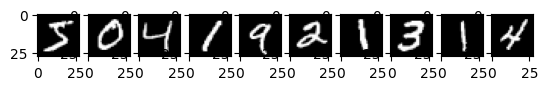

In [4]:
# 데이터 세트 이미지 확인
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], 'gray')
plt.show()

In [5]:
# 데이터 세트 라벨 확인
print(train_labels[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [6]:
# 데이터 세트 이미지 전처리
train_images = train_images.reshape((train_images.shape[0], 784))
test_images = test_images.reshape((test_images.shape[0], 784))

# 데이터 세트 이미지 전처리 후 셰이프 확인
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [7]:
# 데이터 세트 라벨 전처리
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 데이터 세트 라벨 전처리 후 셰이프 확인
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [8]:
# 모델 생성
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784,))) # 입력 레이어
model.add(Dense(128, activation='sigmoid')) # 히든 레이어
model.add(Dropout(rate=0.5)) # 드롭아웃
model.add(Dense(10, activation='softmax')) # 출력 레이어

In [9]:
# 컴파일
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['acc'])

In [10]:
# 학습
history = model.fit(train_images, train_labels, batch_size=500,
    epochs=5, validation_split=0.2)

Epoch 1/5
96/96 [==============================] - 6s 40ms/step - loss: 2.4004 - acc: 0.1452 - val_loss: 2.0449 - val_acc: 0.4972
Epoch 2/5
96/96 [==============================] - 3s 29ms/step - loss: 2.1202 - acc: 0.2480 - val_loss: 1.8408 - val_acc: 0.6453
Epoch 3/5
96/96 [==============================] - 3s 34ms/step - loss: 1.9276 - acc: 0.3369 - val_loss: 1.6716 - val_acc: 0.7099
Epoch 4/5
96/96 [==============================] - 2s 24ms/step - loss: 1.7638 - acc: 0.4207 - val_loss: 1.5233 - val_acc: 0.7459
Epoch 5/5
96/96 [==============================] - 2s 24ms/step - loss: 1.6284 - acc: 0.4788 - val_loss: 1.3911 - val_acc: 0.7722


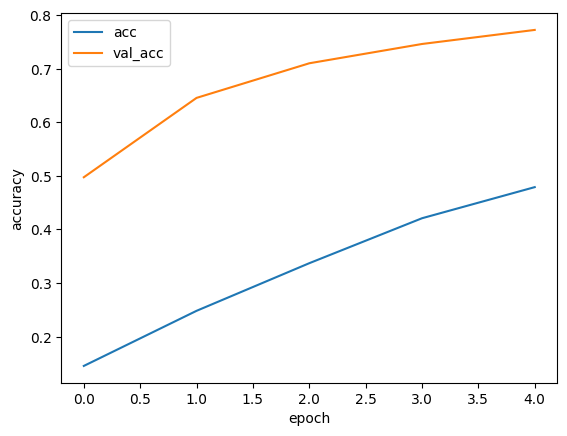

In [11]:
# 그래프 표시
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [12]:
# 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc ))

313/313 [==============================] - 1s 2ms/step - loss: 1.3927 - acc: 0.7681
loss: 1.393
acc: 0.768


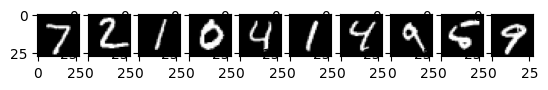

1/1 [==============================] - 0s 92ms/step
[7 2 1 0 4 1 4 9 6 7]


In [13]:
# 추론할 이미지 표시
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i].reshape((28, 28)), 'gray')
plt.show()

# 추론한 라벨 표시
test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions, axis=1)
print(test_predictions)